```
How To Build a Neural Network to Recognize
Handwritten Digits with TensorFlow
```

- [link](https://subscription.packtpub.com/book/data/9781838823412/1/ch01lvl1sec08/a-real-example-recognizing-handwritten-digits)

- [prepare environment](https://gretel.ai/blog/install-tensorflow-with-cuda-cdnn-and-gpu-support-in-4-easy-steps)

```sh
conda create --name=tf python=3.9
conda activate tf
conda install -c conda-forge cudatoolkit=11.2.2 cudnn=8.1.0

mkdir -p $CONDA_PREFIX/etc/conda/activate.d
echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/' > $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh

conda activate tf
python3 -m pip install tensorflow==2.10

# Verify install:
python3 -c "import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'; import tensorflow as tf; print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))"
```

In [3]:
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
warnings.filterwarnings('ignore')

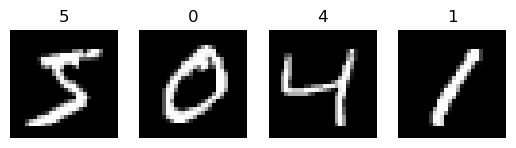

In [9]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(x_train[i], cmap=plt.get_cmap('gray'))
    ax[i].set_title(y_train[i])
    ax[i].axis('off')


In [12]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
history = model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

loss_per_epoch = history.history['loss']
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
# plt.plot(loss_per_epoch)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2089 - accuracy: 0.6949 - val_loss: 0.6152 - val_accuracy: 0.8525
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5053 - accuracy: 0.8705 - val_loss: 0.4124 - val_accuracy: 0.8905
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3907 - accuracy: 0.8929 - val_loss: 0.3514 - val_accuracy: 0.9010
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3458 - accuracy: 0.9027 - val_loss: 0.3196 - val_accuracy: 0.9110
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3192 - accuracy: 0.9086 - val_loss: 0.2997 - val_accuracy: 0.9128
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3010 - accuracy: 0.9136 - val_loss: 0.2858 - val_accuracy: 0.9172
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2863 - accuracy: 0.9177 - val_loss: 0.2731 - val_accuracy:

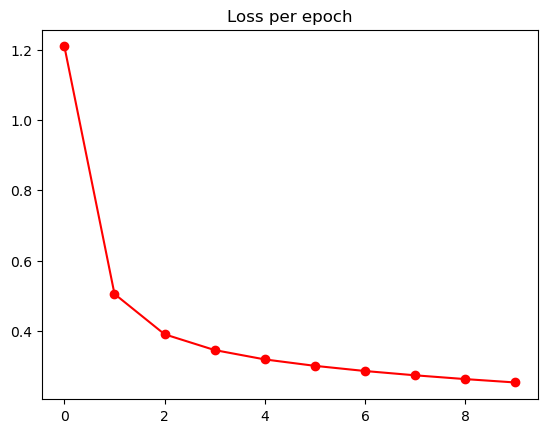

In [13]:
plt.figure(figsize=(5, 4))
plt.plot(loss_per_epoch, marker="o", color='r')
plt.title("Loss per epoch");

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the training data into training and validation sets
validation_split = 0.2

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
          validation_split=validation_split)

loss_per_epoch = history.history['loss']
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print(loss_per_epoch)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4270 - accuracy: 0.8729 - val_loss: 0.1803 - val_accuracy: 0.9480
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2398 - accuracy: 0.9287 - val_loss: 0.1397 - val_accuracy: 0.9592
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1975 - accuracy: 0.9411 - val_loss: 0.1190 - val_accuracy: 0.9648
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1757 - accuracy: 0.9470 - val_loss: 0.1113 - val_accuracy: 0.9681
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1584 - accuracy: 0.9524 - val_loss: 0.1034 - val_accuracy: 0.9707
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1450 - accuracy: 0.9563 - val_loss: 0.0990 - val_accuracy: 0.9706
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1389 - accuracy: 0.9567 - val_loss: 0.0946 - val_accuracy:

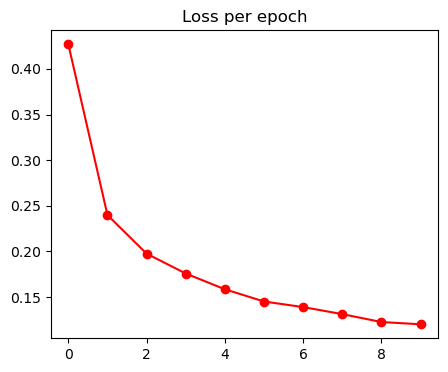

In [16]:
plt.figure(figsize=(5, 4))
plt.plot(loss_per_epoch, marker="o", color='r')
plt.title("Loss per epoch");

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the training data into training and validation sets
validation_split = 0.2
split_index = int((1 - validation_split) * len(x_train))

x_val = x_train[split_index:]
y_val = y_train[split_index:]

x_train = x_train[:split_index]
y_train = y_train[:split_index]

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 5
batch_size = 32

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

loss_per_epoch = history.history['loss']
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.9072 - val_loss: 0.1249 - val_accuracy: 0.9622
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1341 - accuracy: 0.9610 - val_loss: 0.1004 - val_accuracy: 0.9705
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0962 - accuracy: 0.9716 - val_loss: 0.1011 - val_accuracy: 0.9731
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0747 - accuracy: 0.9782 - val_loss: 0.0813 - val_accuracy: 0.9776
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9783
Test Loss: 0.07529717683792114
Test Accuracy: 0.9782999753952026


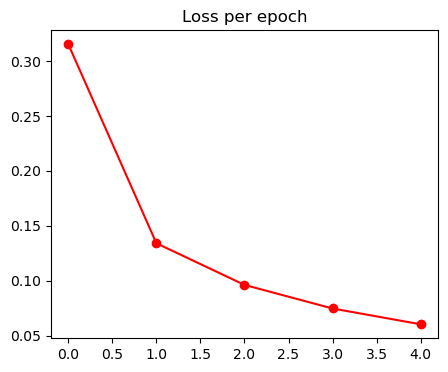

In [20]:
plt.figure(figsize=(5, 4))
plt.plot(loss_per_epoch, marker="o", color='r')
plt.title("Loss per epoch");

In [ ]:
# to abort training based on loss change


import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the training data into training and validation sets
validation_split = 0.2

# Define the custom callback to abort training based on loss change
class LossChangeCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(LossChangeCallback, self).__init__()
        self.threshold = threshold
        self.previous_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        loss_change = abs(self.previous_loss - current_loss)
        if loss_change < self.threshold:
            self.model.stop_training = True
        else:
            self.previous_loss = current_loss


# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the custom callback
epochs = 100
batch_size = 32
threshold = 0.001

callback = LossChangeCallback(threshold)

history = model.fit(x_train, y_train, epochs=epochs,
                    batch_size=batch_size,
                    validation_split=validation_split,
                    callbacks=[callback])

loss_per_epoch = history.history['loss']
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Text(0.5, 1.0, 'Loss per epoch')

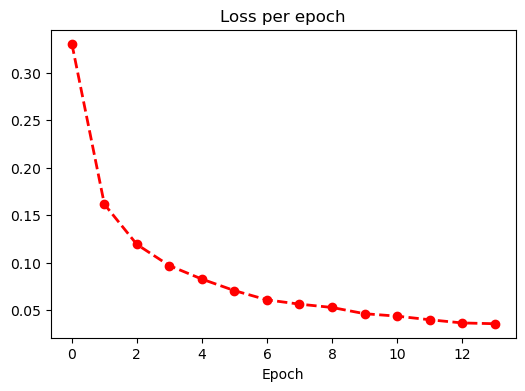

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, marker="o", lw=2, ls="--", color="r")
plt.xlabel("Epoch")
plt.title("Loss per epoch")